# objective

# to predict the price of cars
## here the y is price of cars
so to predict a contenious target ,here we use loniar reggresion


# import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from  sklearn import preprocessing
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [4]:
car=pd.read_csv("CarPrice_Assignment-checkpoint(1).csv")
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
car.shape

(205, 26)

In [6]:
car.size

5330

In [7]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
car.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [9]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
car.duplicated().sum()

np.int64(0)

In [12]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# data preprocssing

In [14]:
len(car["car_ID"])

205

In [15]:
car.drop(["car_ID"],axis=1,inplace=True)

In [16]:
car

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [17]:
car["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2])

In [18]:
car.loc[1:2,"carbody"]

1    convertible
2      hatchback
Name: carbody, dtype: object

In [19]:
print(len(car["CarName"].unique()))
car["CarName"].unique()

147


array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

# feature engneering

In [20]:
car["Company"]=car.CarName.str.split(expand=True)[0]
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [21]:
car["Company"]

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: Company, Length: 205, dtype: object

# label enconding

In [22]:
label_encoder=preprocessing.LabelEncoder()

In [23]:
car["CarName"]=label_encoder.fit_transform(car["CarName"])
car["fueltype"]=label_encoder.fit_transform(car["fueltype"])
car["aspiration  "]=label_encoder.fit_transform(car["aspiration"])
car["doornumber"]=label_encoder.fit_transform(car["doornumber"])
car["carbody"]=label_encoder.fit_transform(car["carbody"])
car["drivewheel"]=label_encoder.fit_transform(car["drivewheel"])
car["enginelocation "]=label_encoder.fit_transform(car["enginelocation"])
car["enginetype"]=label_encoder.fit_transform(car["enginetype"])
car["cylindernumber"]=label_encoder.fit_transform(car["cylindernumber"])
car["fuelsystem"]=label_encoder.fit_transform(car["fuelsystem"])
car["Company"]=label_encoder.fit_transform(car["Company"])
                                             

In [24]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    int64  
 2   fueltype          205 non-null    int64  
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    int64  
 6   drivewheel        205 non-null    int64  
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    int64  
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    int64  
 1

In [25]:
print(len(car.columns))
car

28


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,aspiration,enginelocation
0,3,2,1,std,1,0,2,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495.0,1,0,0
1,3,3,1,std,1,0,2,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500.0,1,0,0
2,1,1,1,std,1,2,2,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500.0,1,0,0
3,2,4,1,std,0,3,1,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950.0,2,0,0
4,2,5,1,std,0,3,0,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,std,0,3,2,front,109.1,188.8,...,3.15,9.5,114,5400,23,28,16845.0,26,0,0
201,-1,138,1,turbo,0,3,2,front,109.1,188.8,...,3.15,8.7,160,5300,19,25,19045.0,26,1,0
202,-1,140,1,std,0,3,2,front,109.1,188.8,...,2.87,8.8,134,5500,18,23,21485.0,26,0,0
203,-1,142,0,turbo,0,3,2,front,109.1,188.8,...,3.40,23.0,106,4800,26,27,22470.0,26,1,0


# feature selection

In [26]:
car.shape

(205, 28)

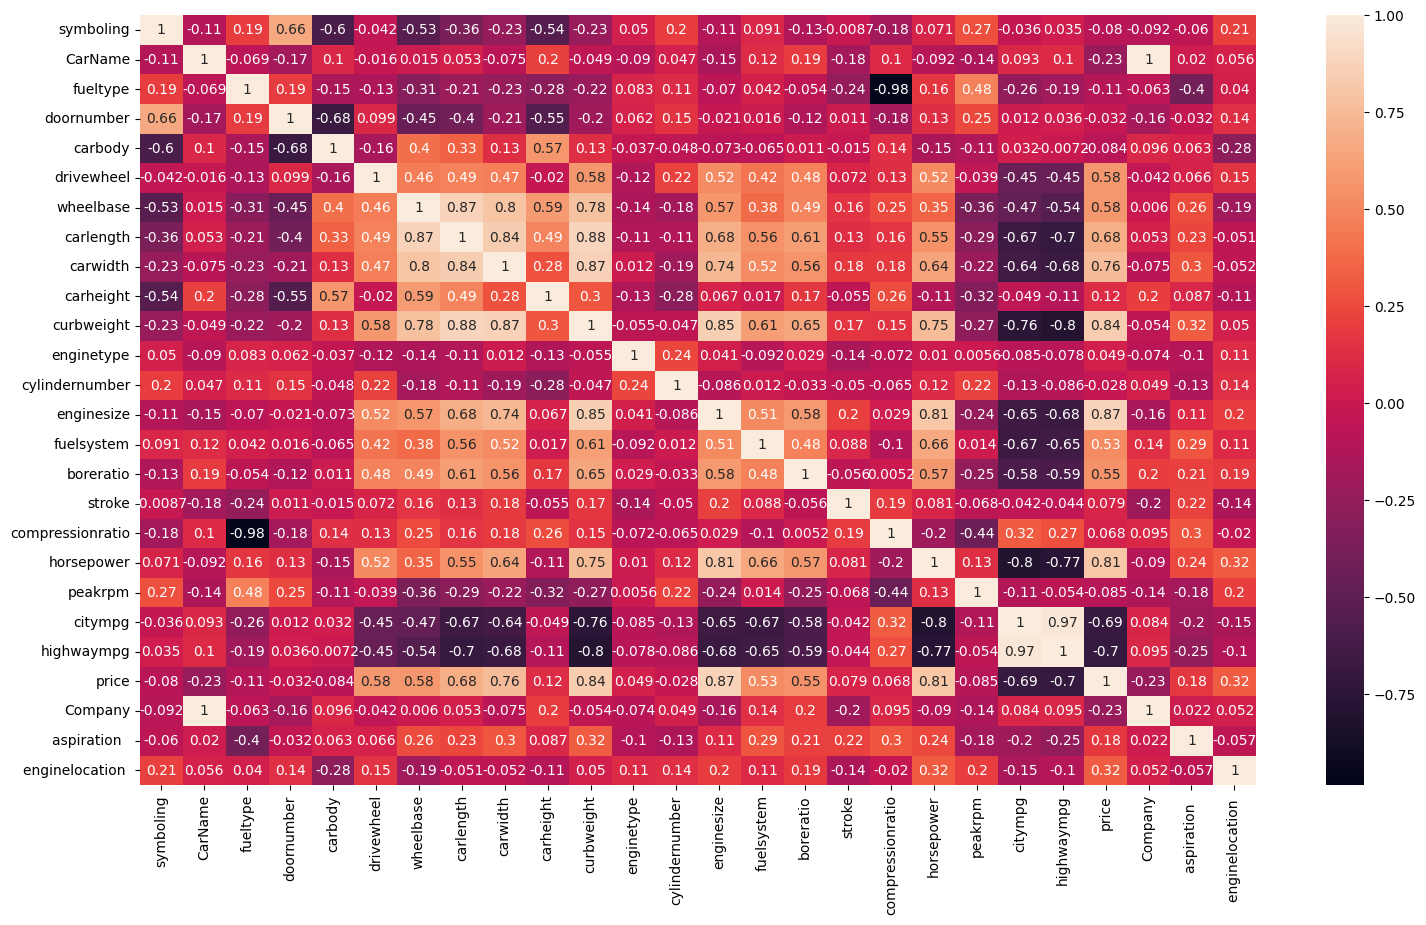

In [27]:
# exclude non-numeric columns
numeric_car=car.select_dtypes(include=[float,int])

plt.figure(figsize=(18,10))
ax=sns.heatmap(numeric_car.corr(),annot=True)
plt.show()
           

# EDA

# Univariate Data Visualization:

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
x=car[["symboling","fueltype","doornumber","carbody","carheight","stroke","compressionratio","horsepower","peakrpm","Company"]]

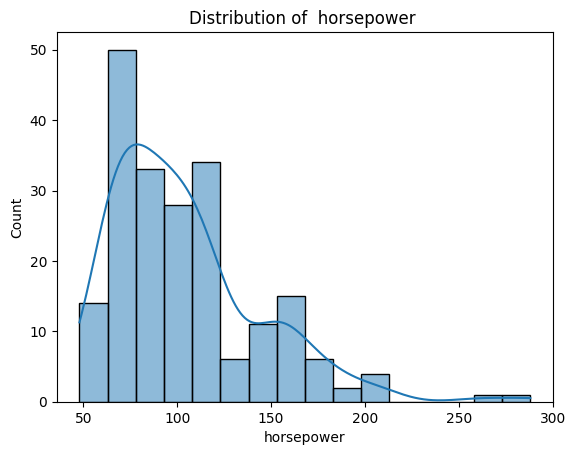

In [64]:
sns.histplot(car['horsepower'], kde=True)
plt.title("Distribution of  horsepower ")
plt.show()

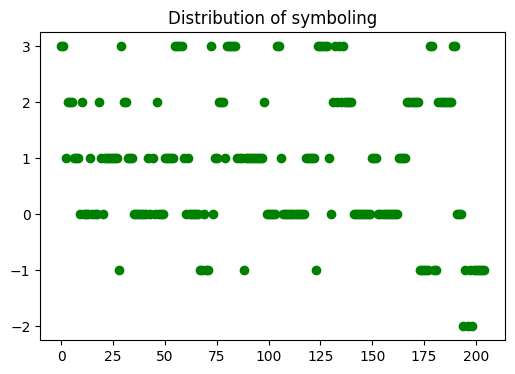

In [65]:
plt.bfigure(figsize=(6,4))
plt.scatter(car.index, car['symboling'], color='green')
plt.title("Scatter plot of symboling")
plt.title("Distribution of symboling")
plt.show()

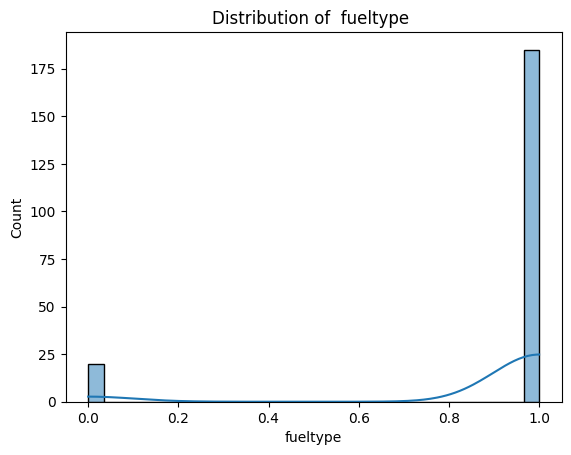

In [74]:
sns.histplot(car['fueltype'], kde=True)
plt.title("Distribution of  fueltype ")
plt.show()

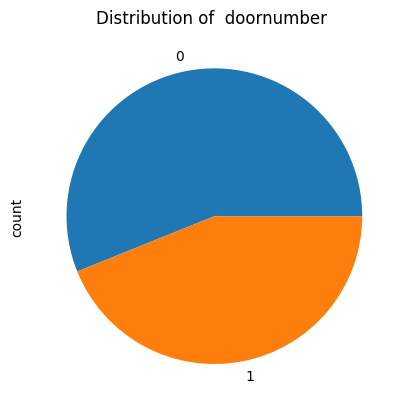

In [75]:
car["doornumber"].value_counts().plot.pie()
plt.title("Distribution of  doornumber ")
plt.show()

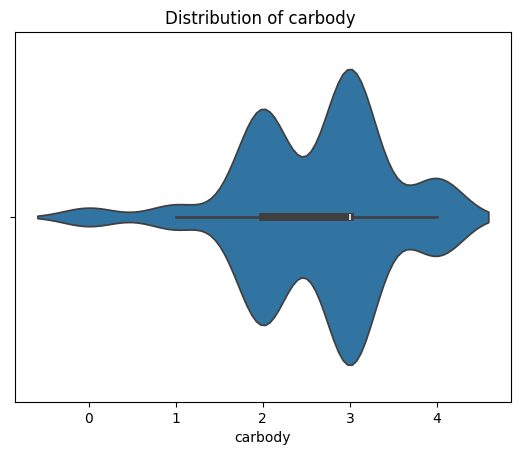

In [76]:
sns.violinplot(x=car['carbody'])
plt.title("Distribution of carbody ")
plt.show()


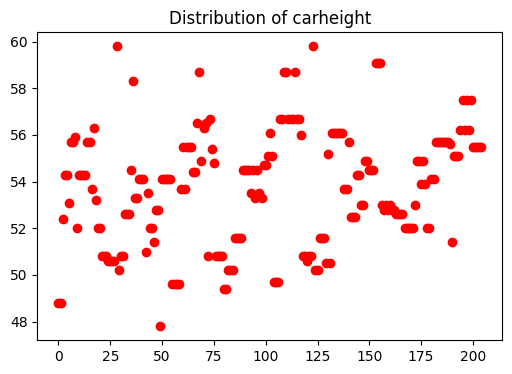

In [77]:
plt.figure(figsize=(6,4))
plt.scatter(car.index, car["carheight"], color='Red')
plt.title("Scatter plot of carheight")
plt.title("Distribution of carheight")
plt.show()

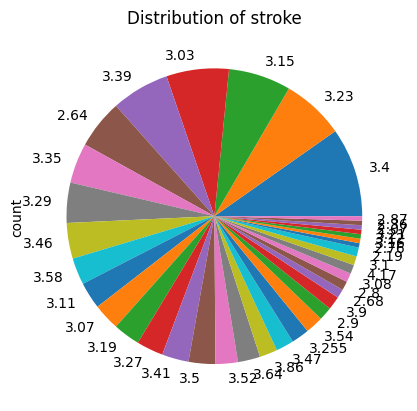

In [81]:
car["stroke"].value_counts().plot.pie()
plt.title("Distribution of stroke" )
plt.show()

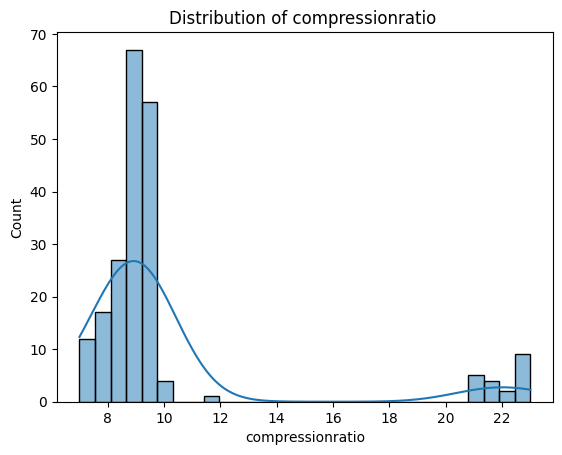

In [82]:
sns.histplot(car['compressionratio'], kde=True)
plt.title("Distribution of compressionratio ")
plt.show()

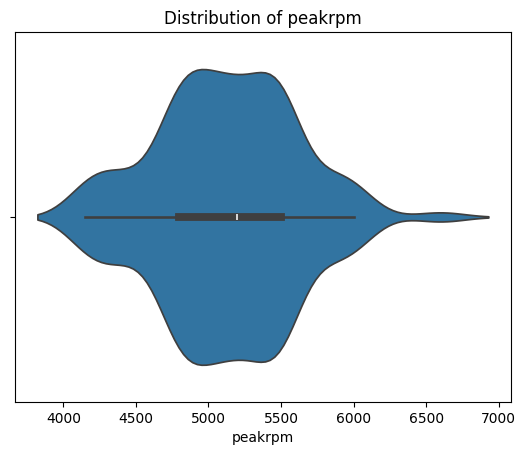

In [83]:
sns.violinplot(x=car["peakrpm"])
plt.title("Distribution of peakrpm")
plt.show()

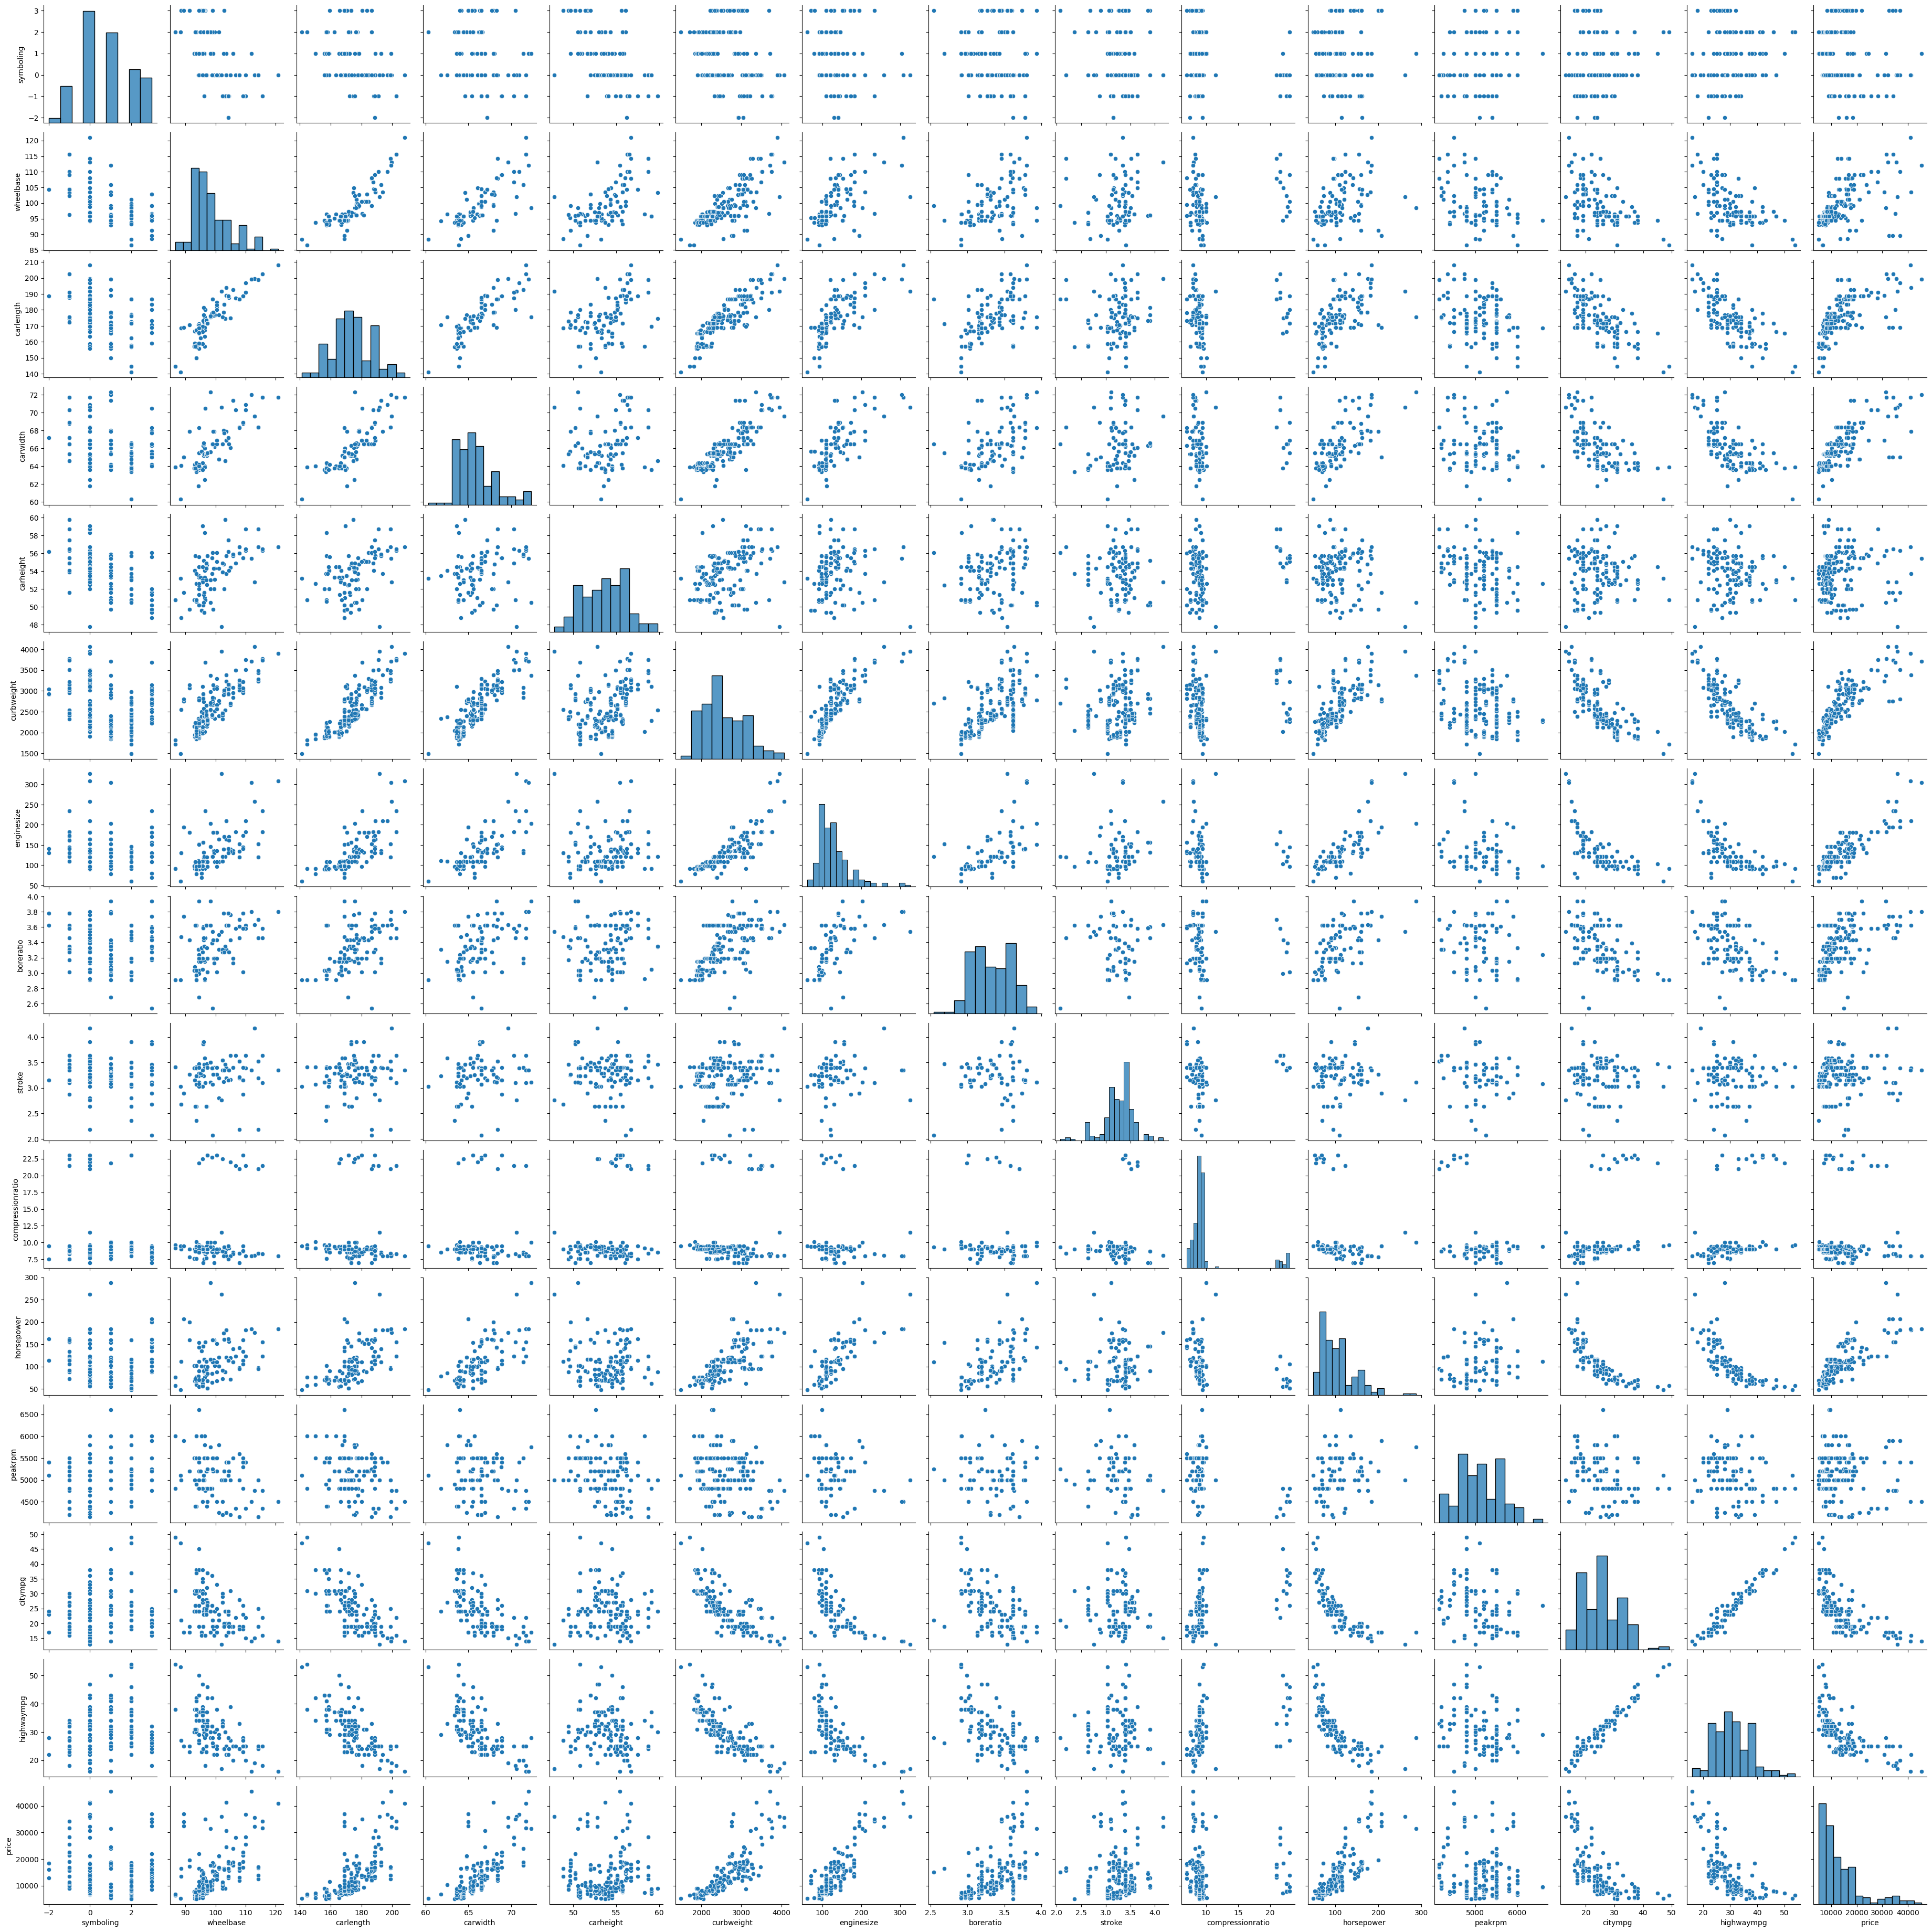

In [62]:
selected_columns=[
    "symboling","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke",
    "compressionratio","horsepower","peakrpm","citympg","highwaympg","price"
]


selected_data=car[selected_columns]

sns.pairplot(selected_data)
plt.show()
    

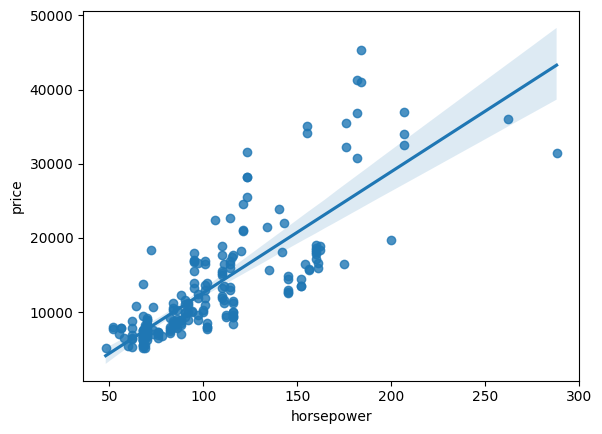

In [31]:
sns.regplot(x="horsepower",y="price",data=car)
plt.show()

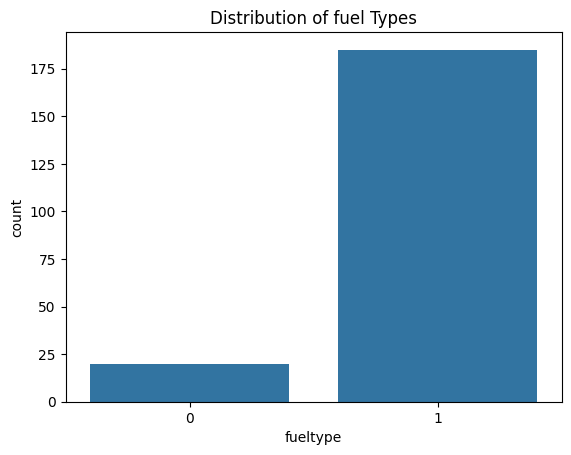

In [32]:
sns.countplot(data=car,x="fueltype")
plt.title("Distribution of fuel Types")
plt.show()

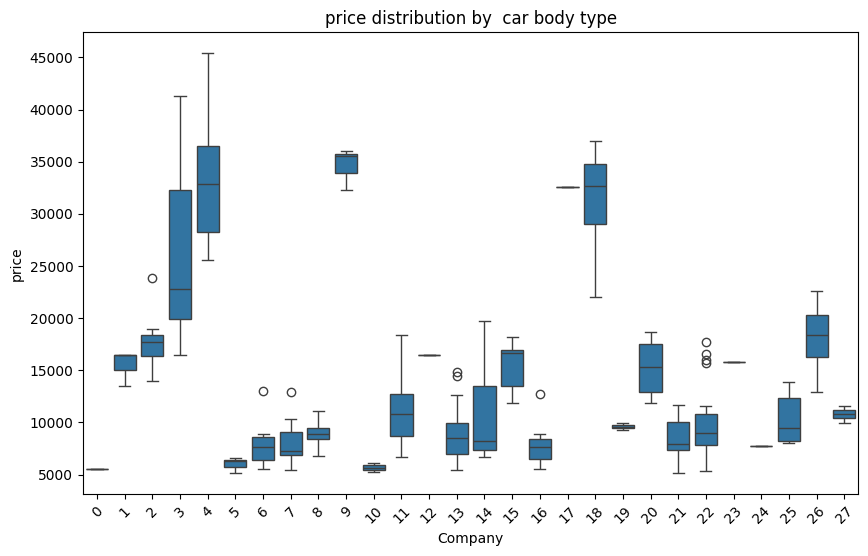

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(data=car,x="Company",y="price")
plt.xticks(rotation=45)
plt.title("price distribution by  car body type")
plt.show()

# featured selection

In [34]:
car.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'Company',
       'aspiration  ', 'enginelocation '],
      dtype='object')

In [35]:
x=car[["symboling","fueltype","doornumber","carbody","carheight","stroke","compressionratio","horsepower","peakrpm","Company"]]
y=car[["price"]]
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,aspiration,enginelocation
0,3,2,1,std,1,0,2,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495.0,1,0,0
1,3,3,1,std,1,0,2,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500.0,1,0,0
2,1,1,1,std,1,2,2,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500.0,1,0,0
3,2,4,1,std,0,3,1,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950.0,2,0,0
4,2,5,1,std,0,3,0,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450.0,2,0,0


### spliting data set

In [36]:
from sklearn.model_selection import train_test_split

# split the data into training and testing sets (e.g. , 80% train and 20% test)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [37]:
x.shape

(205, 10)

In [38]:
y.shape

(205, 1)

In [39]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (164, 10)
y_train: (164, 1)
x_test: (41, 10)
y_test: (41, 1)


In [40]:
print(x_train)

     symboling  fueltype  doornumber  carbody  carheight  stroke  \
101          0         1           0        3       55.1    3.27   
131          2         1           1        2       50.5    3.90   
6            1         1           0        3       55.7    3.40   
63           0         0           0        3       55.5    3.39   
173         -1         1           0        3       54.9    3.54   
..         ...       ...         ...      ...        ...     ...   
134          3         1           1        2       56.1    2.07   
140          2         1           1        2       55.7    2.64   
190          3         1           1        2       51.4    3.40   
2            1         1           1        2       52.4    3.47   
148          0         1           0        4       54.9    2.64   

     compressionratio  horsepower  peakrpm  Company  
101               9.0         152     5200       14  
131               8.7          90     5100       19  
6                 8.5

In [41]:
#MODEL SELECTION
reg= LinearRegression()


In [42]:
reg.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
# evalute the modele on the trainig data
score= reg.score(x_train,y_train)

print("R-sqaured score:", score)

## 80% accuracy for training data


R-sqaured score: 0.7864307878920153


In [44]:
predict=reg.predict(x_test)
predict

array([[ 8488.86652069],
       [14294.74152617],
       [11804.48116641],
       [10540.05476698],
       [ 7023.45591704],
       [13319.03031628],
       [ 8221.6320979 ],
       [ 6434.63413242],
       [26234.74399088],
       [ 6210.76870158],
       [30032.5456108 ],
       [10144.81756743],
       [ 9156.81054339],
       [ 5726.52881063],
       [ 6760.63487402],
       [29247.1132447 ],
       [25071.57469181],
       [40784.38278158],
       [25905.47678388],
       [ 7752.16780496],
       [10239.13072594],
       [ 6760.63487402],
       [ 8014.95518697],
       [11719.30820706],
       [ 8897.25308639],
       [14209.74522008],
       [10354.03455074],
       [21302.7490429 ],
       [19435.76627534],
       [11050.70015592],
       [19726.92273228],
       [ 9777.20345509],
       [ 6851.16290615],
       [ 6317.02784089],
       [12231.15692864],
       [ 7430.95303941],
       [20191.49413521],
       [ 8077.0431915 ],
       [ 8095.54981803],
       [14209.74522008],


In [45]:
test_data_df = x_test.copy()

test_data_df['Predicted_price'] = predict

test_data_df['actual_price']=y_test 

test_data_df.head()

,symboling,fueltype,doornumber,carbody,carheight,stroke,compressionratio,horsepower,peakrpm,Company,Predicted_price,actual_price
51,1,1,1,2,54.1,3.15,9.0,68,5000,10,8488.866521,6095.0
133,2,1,0,3,56.1,3.07,9.3,110,5250,20,14294.741526,12170.0
60,0,1,0,3,55.5,3.39,8.6,84,4800,11,11804.481166,8495.0
36,0,1,0,4,58.3,3.41,9.2,76,6000,7,10540.054767,7295.0
153,0,1,0,4,59.1,3.03,9.0,62,4800,22,7023.455917,6918.0


In [46]:

actual_prices = car['price']


predicted_price = test_data_df['Predicted_price'] = predict

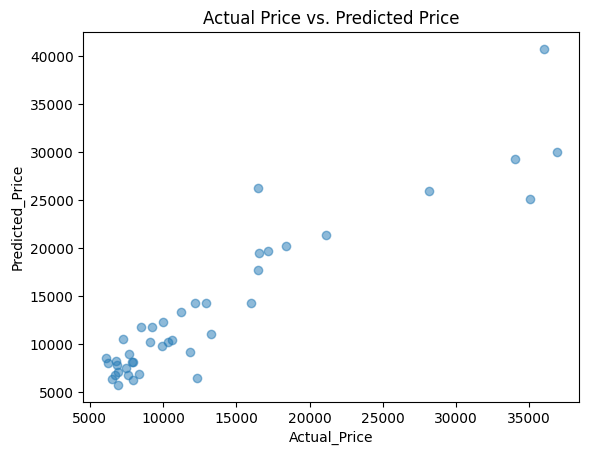

In [47]:
# Scatter plot to visualize actual vs. predicted prices
plt.scatter(y_test, predicted_price, alpha=0.5)
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual Price vs. Predicted Price')
plt.show()

# model evaluation

In [48]:
# EVALUATE X_TEST, AND PREDICTED DATA

In [49]:
score= reg.score(x_test, predict)

print("R-sqaured score:", score)

## 80% accuracy for training data

R-sqaured score: 1.0


In [50]:
# Evaluate the model on the testing data
score = reg.score(x_test, y_test)

# Print the R-squared score
print("R-squared score:", score)


## 74% accuracy of testing data


R-squared score: 0.8598130449106414


In [51]:
## cost function of the linear reggresion is mse

In [52]:
# cost function
# A cost function tells us how wrong our model is. It measures the difference between predicted values and actual value

In [53]:
#It’s one of the most common cost functions used in regression models.It measures how far predictions are from the actual values.

In [54]:
mse = mean_squared_error(y_test, predict)
mse


10398096.100888757

In [55]:
import math
rmse = math.sqrt(24639370.31328334)
rmse


4963.806030989057

In [56]:
reg.intercept_

array([-36213.30842341])

In [57]:
# 

In [58]:
reg.coef_

array([[-2.32285701e+02,  8.72040822e+03, -1.30530527e+03,
        -1.25432031e+03,  6.48431087e+02, -1.50060718e+03,
         9.99510744e+02,  1.75522776e+02, -1.71680243e+00,
        -2.67234423e+02]])

In [84]:
y=mx+c

NameError: name 'mx' is not defined